In [18]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt



💥 What’s the Problem?
Sometimes, data isn’t linearly separable — you can’t draw a straight line to separate classes.

To fix that, we can map data to a higher-dimensional space where it might become linearly separable.

For example:

A 2D circle can’t be separated by a line,

But if you lift the data into 3D (add a feature like x² + y²), it can be separated by a plane.

🧠 But… What’s the Problem with THAT?
Adding lots of new features (like all polynomial combinations) means:

Massive computation if your dataset has high dimensions (e.g., 100+ features)

Slow and memory-heavy

💡 The Solution: Kernel Trick
The kernel trick lets you act as if you expanded the features into a high-dimensional space, without actually doing it!

Instead of transforming the data, we just compute how far apart points would be in that higher space by using a special kernel function.

✨ Two Common Kernels:
1. Polynomial Kernel
Computes combinations like:
feature1² * feature2⁵, feature1 * feature3, etc.
→ You choose the degree, and it includes all terms up to that degree.

2. RBF Kernel (Radial Basis Function / Gaussian Kernel)
Treats data as if it’s in an infinite-dimensional space, but gives less weight to higher-degree features.

The formula is:

python
Copy
Edit
k(x1, x2) = exp(-γ ||x1 - x2||²)
||x1 - x2||² → squared Euclidean distance

γ (gamma) → controls how far the "influence" of a point reaches:

Small gamma = broad influence (smooth decision boundary)

Large gamma = narrow influence (complex decision boundary)

👤 What are Support Vectors?
In SVM, not all training points are important. Only those right at the edge of class separation — the support vectors — matter.

These support vectors define the decision boundary

During prediction, SVM measures the distance to these support vectors, weighted by importance (stored in .dual_coef_)

So in short:

The model doesn’t rely on the full training set

It relies on a subset of key points that support the boundary

✅ Summary
The kernel trick lets SVMs classify non-linear data by pretending it’s in a higher-dimensional space — without ever computing that space directly.

Polynomial kernel: All combinations of features up to a degree

RBF (Gaussian) kernel: Considers infinite combinations with decreasing weight

Support vectors: Only the important training points that lie near the class boundary — they define the decision surface

Prediction: Based on distance to support vectors using the chosen kernel function

Text(0, 0.5, 'Feature 1')

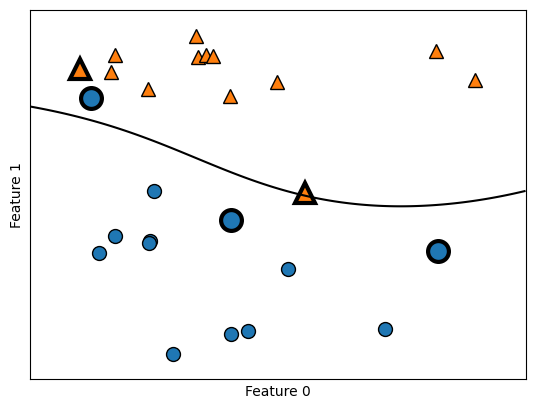

In [19]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
svc=SVC()
svc.fit(X_train,y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


### Preprocessing data for SVMs

One way to resolve this problem is by rescaling each feature so that they are all approximately on the same scale. A common rescaling method for kernel SVMs is to scale the data such that all features have 0 mean and unit variance, or that all features are between 0 and 1. We will see how to do this using the StandardScaler or MinMaxScaler

In [21]:
min_on_training=X_train.min(axis=0) # computing the minimum value per feature on the training set
range_on_training=(X_train.max(axis=0)-min_on_training) # compute the range of each feature on the training set


# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled=(X_train-min_on_training)/range_on_training
X_test_scaled=(X_test-min_on_training)/range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))


Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [22]:
svc=SVC(C=100)
svc.fit(X_train_scaled,y_train)
print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


Kernelized support vector machines are powerful models and perform well on a variety of datasets. SVMs allow for complex decision boundaries, even if the data has only a few features. They work well on low-dimensional and high-dimensional data (i.e., few and many features), but don’t scale very well with the number of samples. Running an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.

Another downside of SVMs is that they require careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no preprocessing) in many applications. Furthermore, SVM models are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a nonexpert.

Still, it might be worth trying SVMs, particularly if all of your features represent measurements in similar units (e.g., all are pixel intensities) and they are on similar scales.

The important parameters in kernel SVMs are the regularization parameter C, the choice of the kernel, and the kernel-specific parameters. Although we primarily focused on the RBF kernel, other choices are available in scikit-learn. The RBF kernel has only one parameter, gamma, which is the inverse of the width of the Gaussian kernel. gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.